In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
data = pd.read_csv('learningSet.csv')

C:\Users\Dana\AppData\Local\Temp\ipykernel_18344\1922756591.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [2]:
print(data.shape)
data.head(10)

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [3]:
data.isna().sum()/len(data)

ODATEDW     0.000000
OSOURCE     0.000000
TCODE       0.000000
STATE       0.000000
ZIP         0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.001383
GEOCODE2    0.001383
Length: 481, dtype: float64

In [4]:
drop_list = [] #building a list of columns to drop
drop_list.append('OSOURCE')
drop_list.append('ZIP')

print(data.shape)

(95412, 481)


In [5]:
nulls_percent_df = pd.DataFrame(data.isna().sum()*100/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,24.802960
23,NUMCHLD,87.018404
24,INCOME,22.309563
26,WEALTH1,46.882992
28,MBCRAFT,55.395548
...,...,...
455,RAMNT_24,81.409047
466,NEXTDATE,10.452564
467,TIMELAG,10.452564
479,CLUSTER2,0.138347


In [6]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']> 50]
columns_above_threshold['column_name']

23      NUMCHLD
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
31     MBCOLECT
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 62, dtype: object

In [7]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [8]:
data = data.drop(columns=drop_columns_list)
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4

In [9]:
data['MAILCODE'].unique()

array([' ', 'B'], dtype=object)

In [10]:
data['MAILCODE'] = np.where(data['MAILCODE']==" " , "A" , data['MAILCODE'])
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [11]:
data.head(5)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9503.0,9502.0,9501.0,9411.0,9410.0,9409.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,NaN,NaN,NaN,XXXX,S1,14,46.0,E,H,NaN,NaN,NaN,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
Y = data[['TARGET_B', 'TARGET_D']]
Y

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [13]:
data['STATE'].value_counts()

STATE
CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: count, dtype: int64

In [16]:
df = pd.DataFrame(data['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
df
other_states = list(df[df['count']<2500]['state'])
other_states

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
data['STATE'] = list(map(clean_state, data['STATE']))

In [17]:
data['STATE'].value_counts()

STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64

In [18]:
gender_mapping = {'M': 'M','F': 'F','other': 'other'}
data['GENDER'] = data['GENDER'].map(gender_mapping).fillna('other')
data['GENDER'] = data['GENDER'].fillna('F')

In [19]:
data['GENDER'].value_counts()

GENDER
F        51277
M        39094
other     5041
Name: count, dtype: int64

In [20]:
data['DOMAIN'].value_counts(dropna=False)

DOMAIN
R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: count, dtype: int64

In [22]:
data['DOMAIN'] = data['DOMAIN'].fillna('R2')

In [23]:
data['DOMAIN_A'] = list(map(lambda x: x[0], data['DOMAIN']))
data['DOMAIN_B'] = list(map(lambda x: x[1], data['DOMAIN']))
data[['DOMAIN','DOMAIN_A','DOMAIN_B']].head()

,DOMAIN,DOMAIN_A,DOMAIN_B
0,T2,T,2
1,S1,S,1
2,R2,R,2
3,R2,R,2
4,S2,S,2


In [24]:
data.DOMAIN_A.value_counts()

DOMAIN_A
R    22106
S    21924
C    19689
T    19527
U    12166
Name: count, dtype: int64

In [25]:
data=data.drop(columns=['DOMAIN'])

In [27]:
data['MAILCODE'].value_counts()

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [28]:
data['NOEXCH'].value_counts()

NOEXCH
0    61203
0    33882
1      195
1       90
X       35
Name: count, dtype: int64

In [29]:
data['MDMAUD'].value_counts()

MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64

In [30]:
drop_list.append('MAILCODE')
drop_list.append('NOEXCH')
drop_list.append('MDMAUD')
drop_list

['OSOURCE', 'ZIP', 'MAILCODE', 'NOEXCH', 'MDMAUD']

In [31]:
drop_list.append('MAILCODE')
drop_list.append('NOEXCH')
drop_list.append('MDMAUD')
drop_list

['OSOURCE',
 'ZIP',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD']

In [32]:
data['CLUSTER'].value_counts(dropna=False)

CLUSTER
40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: count, dtype: int64

In [33]:
data['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [35]:
data['CLUSTER'] = data['CLUSTER'].fillna('40')

In [36]:
data['HOMEOWNR'].value_counts(dropna=False)

HOMEOWNR
H      52354
NaN    22228
U      20830
Name: count, dtype: int64

In [39]:
data['HOMEOWNR'] = data['HOMEOWNR'].fillna('N') # assumption: NAN means 'not a home owner'

In [40]:
data['DATASRCE'].value_counts(dropna=False)

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: count, dtype: int64

In [42]:
data['DATASRCE'] = data['DATASRCE'].fillna('0') # 'not found in any external data source'

In [43]:
data['GEOCODE2'].value_counts(dropna=False) # drop low amounts of NaN

GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: count, dtype: int64

In [44]:
RFA_columns_to_drop = data.loc[:, 'RFA_2':'RFA_24'].columns.tolist()

In [45]:
drop_list.extend(RFA_columns_to_drop)
drop_list

['OSOURCE',
 'ZIP',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [46]:
data['ADATE_2'].value_counts(dropna=False)

ADATE_2
9706    95399
9704       13
Name: count, dtype: int64

In [47]:
ADATE_columns_to_drop = data.loc[:, 'ADATE_2':'ADATE_24'].columns.tolist()

In [48]:
drop_list.extend(ADATE_columns_to_drop)
drop_list

['OSOURCE',
 'ZIP',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_21',
 'ADATE_22',
 'ADATE_24']

In [49]:
data['AGE'].value_counts(dropna=False)

AGE
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

C:\ANACONDA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


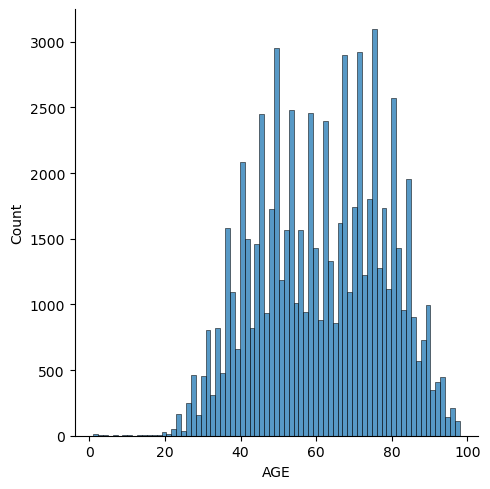

In [51]:
sns.displot(data['AGE'])
plt.show()

In [54]:
data['AGE'] = data["AGE"].fillna(np.median(data['AGE'])) 

C:\ANACONDA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


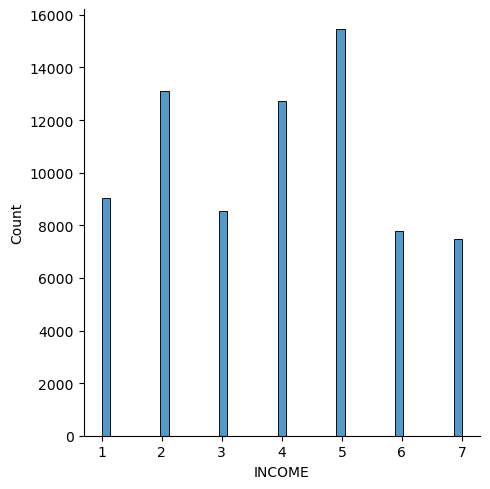

In [53]:
sns.displot(data['INCOME']) 
plt.show()

In [55]:
print(data['INCOME'].value_counts(dropna=False))
data['INCOME'] = data['INCOME'].astype(object)

INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


In [56]:
data['INCOME'] = data['INCOME'].fillna(5.0) # Replacing the null values with the most represented category

C:\ANACONDA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


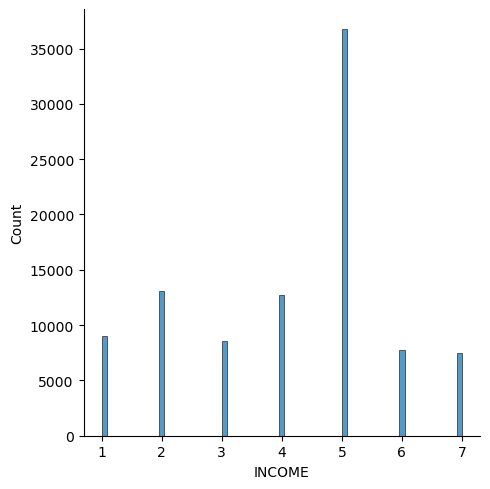

In [58]:
sns.displot(data['INCOME']) 
plt.show()

C:\ANACONDA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


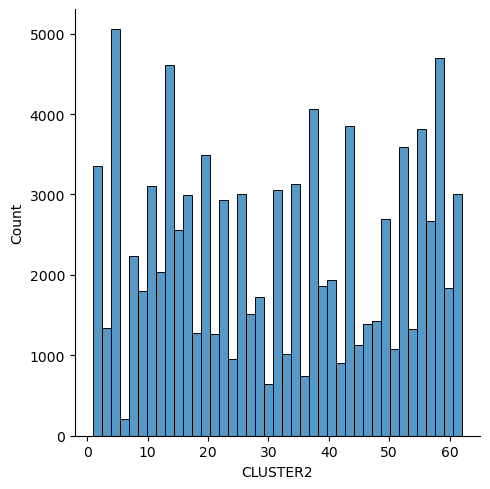

In [59]:
sns.displot(data[data['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [60]:
data['CLUSTER2'].value_counts(dropna=False)

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: count, Length: 63, dtype: int64

In [61]:
np.mean(data['CLUSTER2'])

31.533711167086484

In [62]:
data['CLUSTER2'] = data['CLUSTER2'].fillna(np.ceil(np.mean(data['CLUSTER2'])))

In [63]:
np.ceil(np.mean(data['CLUSTER2']))

32.0

In [64]:
data.WEALTH2.value_counts(dropna=False)

WEALTH2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

In [65]:
data['WEALTH2'] = data['WEALTH2'].astype('object')
data['WEALTH2'] = data['WEALTH2'].fillna('5.0') # median

In [66]:
data.TIMELAG.value_counts(dropna=False)

TIMELAG
NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: count, Length: 69, dtype: int64

In [68]:
data['TIMELAG'] = data['TIMELAG'].fillna(0.0) # (0.0) = they only made one donation so far 

In [69]:
df = pd.DataFrame(data.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
1,OSOURCE,928
6,PVASTATE,93954
8,NOEXCH,7
9,RECINHSE,88709
10,RECP3,93395
...,...,...
385,RFA_22,25648
386,RFA_23,56274
387,RFA_24,36973
403,NEXTDATE,9973


In [73]:
len(drop_list)

51

In [74]:
data.shape

(95412, 420)

In [75]:
data = data.drop(columns=drop_list)

In [76]:
data.shape

(95412, 372)

In [77]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
print(numerical.shape)

(95412, 322)


In [78]:
categorical = data.select_dtypes(object)
print(categorical.shape)

(95412, 48)


In [79]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
5,WEALTH1,44732
134,MSA,132
135,ADI,132
136,DMA,132
315,NEXTDATE,9973


In [81]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,5.0,NaN,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,

In [82]:
categorical.head()

,STATE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,NaN,NaN,NaN,NaN,NaN,36,NaN,N,NaN,NaN,NaN,NaN,F,0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L,E,X,X,X,C,T,2
1,CA,NaN,NaN,NaN,NaN,NaN,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,G,X,X,X,A,S,1
2,NC,NaN,NaN,NaN,NaN,NaN,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L,E,X,X,X,C,R,2
3,CA,NaN,NaN,NaN,NaN,NaN,44,E,U,NaN,NaN,NaN,NaN,F,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L,E,X,X,X,C,R,2
4,FL,NaN,X,X,NaN,NaN,16,E,H,NaN,NaN,NaN,NaN,F,3,NaN,12,NaN,5.0,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,3,NaN,L,F,X,X,X,A,S,2
